# Google Analytics Sample Data

This dataset contains website users data (Google Analytics data) from Jan 1, 2017 to Jul 31, 2017. The dataset contains obfuscated Google Analytics 360 data from the Google Merchandise store, a real ecommerce store. The Google Merchandise Store sells Google branded merchandise.

The data is typical of what you would see for an ecommerce website. Is decision tree or random forest a good prediction model to predict if the new visitor will transact or not? 

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import resample
import warnings 
warnings.filterwarnings("ignore")

C:\Users\vibha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_df=pd.read_csv(r'sample_user_data.csv')
data_df.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,785078151568671210,1,20170427,1493331229,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,142102319075727733,1,20170427,1493316667,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1015855318272495035,1,20170427,1493295075,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,7452646484470618802,1,20170427,1493299324,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,1985244892543433393,3,20170427,1493309497,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


### Basics EDA

In [3]:
#Shape of the data

data_df.shape

(464439, 17)

In [4]:
#Basic Info if the data

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fullVisitorId            464439 non-null  object 
 1   VisitNumber              464439 non-null  int64  
 2   Date                     464439 non-null  int64  
 3   VisitStartTime           464439 non-null  int64  
 4   bounces                  232178 non-null  float64
 5   pageviews                464387 non-null  float64
 6   timeOnSite               231612 non-null  float64
 7   totalTransactionRevenue  6308 non-null    float64
 8   transactions             6308 non-null    float64
 9   source                   464439 non-null  object 
 10  medium                   464439 non-null  object 
 11  campaign                 464439 non-null  object 
 12  deviceCategory           464439 non-null  object 
 13  operatingSystem          464439 non-null  object 
 14  mobi

In [5]:
data_df.isnull().sum()

fullVisitorId                   0
VisitNumber                     0
Date                            0
VisitStartTime                  0
bounces                    232261
pageviews                      52
timeOnSite                 232827
totalTransactionRevenue    458131
transactions               458131
source                          0
medium                          0
campaign                        0
deviceCategory                  0
operatingSystem                 0
mobileDeviceModel               0
city                            0
ChannelGrouping                 0
dtype: int64

In [6]:
##Describe the data to get statistical info

data_df.describe()

,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions
count,464439.000000,4.644390e+05,4.644390e+05,232178.0,464387.000000,231612.000000,6.308000e+03,6308.000000
mean,2.334040,2.017042e+07,1.492485e+09,1.0,3.772011,279.921610,1.617053e+08,1.046449
std,9.879354,2.006430e+02,5.279611e+06,0.0,6.403579,492.292307,9.034953e+08,0.531457
min,1.000000,2.017010e+07,1.483258e+09,1.0,1.000000,1.000000,2.200000e+06,1.000000
25%,1.000000,2.017022e+07,1.487899e+09,1.0,1.000000,33.000000,2.899000e+07,1.000000
50%,1.000000,2.017042e+07,1.492441e+09,1.0,1.000000,94.000000,5.297500e+07,1.000000
75%,1.000000,2.017061e+07,1.497075e+09,1.0,4.000000,290.000000,1.119375e+08,1.000000
max,395.000000,2.017073e+07,1.501571e+09,1.0,466.000000,12136.000000,4.708206e+10,25.000000


In [7]:
#Total Columns

print("TOtal columns in data set is {} which are {}".format(len(data_df.columns), list(data_df.columns)))

TOtal columns in data set is 17 which are ['fullVisitorId', 'VisitNumber', 'Date', 'VisitStartTime', 'bounces', 'pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions', 'source', 'medium', 'campaign', 'deviceCategory', 'operatingSystem', 'mobileDeviceModel', 'city', 'ChannelGrouping']


### Data Imputation

In [8]:
data_df["transactions"].fillna(0, inplace= True)#Transaction could be the the output col, and if the the row which have nan value it means the coustomer has not obtained transactions. So, where i can mark 0.
data_df["bounces"].fillna(0, inplace= True) #Not bounced mean they may have purchased the products
data_df["pageviews"].fillna(0, inplace= True) #Null in page views it means they may habve not viewed even a single page
data_df["timeOnSite"].fillna(0, inplace= True) #Time on site is null means it means they dont even spent a single minute in a site
data_df["totalTransactionRevenue"].fillna(0, inplace= True) #If it is null, it mean not revenue generate



In [9]:
#Now, check the null values in the dataset

data_df.isnull().sum()

fullVisitorId              0
VisitNumber                0
Date                       0
VisitStartTime             0
bounces                    0
pageviews                  0
timeOnSite                 0
totalTransactionRevenue    0
transactions               0
source                     0
medium                     0
campaign                   0
deviceCategory             0
operatingSystem            0
mobileDeviceModel          0
city                       0
ChannelGrouping            0
dtype: int64

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fullVisitorId            464439 non-null  object 
 1   VisitNumber              464439 non-null  int64  
 2   Date                     464439 non-null  int64  
 3   VisitStartTime           464439 non-null  int64  
 4   bounces                  464439 non-null  float64
 5   pageviews                464439 non-null  float64
 6   timeOnSite               464439 non-null  float64
 7   totalTransactionRevenue  464439 non-null  float64
 8   transactions             464439 non-null  float64
 9   source                   464439 non-null  object 
 10  medium                   464439 non-null  object 
 11  campaign                 464439 non-null  object 
 12  deviceCategory           464439 non-null  object 
 13  operatingSystem          464439 non-null  object 
 14  mobi

## Univariate Analysis

In [11]:
def univariate_analysis(col, x_label):
    print(col.value_counts())
    sns.set_style(style="darkgrid")
    sns.countplot(x=col, data=data_df)
    plt.xlabel(x_label)
    plt.ylabel("Frequency")
    plt.show()

bounces
0.0    232261
1.0    232178
Name: count, dtype: int64


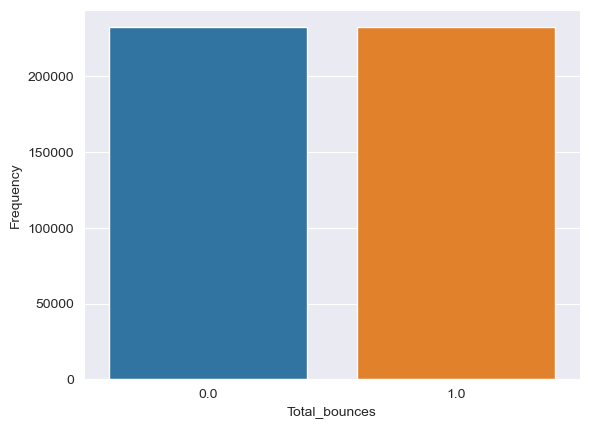

In [12]:
#Total_bounces

univariate_analysis(data_df["bounces"], "Total_bounces")

In [13]:
#totals_bounces
#Checking the total page views for bounce customers

print(data_df.loc[data_df["bounces"]==1]["pageviews"].value_counts())
print(data_df.loc[data_df["bounces"]==1]["transactions"].value_counts())

pageviews
1.0    232178
Name: count, dtype: int64
transactions
0.0    232178
Name: count, dtype: int64


campaign
(not set)                             446332
Data Share Promo                        9708
AW - Accessories                        5318
AW - Dynamic Search Ads Whole Site      3045
AW - Apparel                              32
AW - Electronics                           3
Data Share                                 1
Name: count, dtype: int64


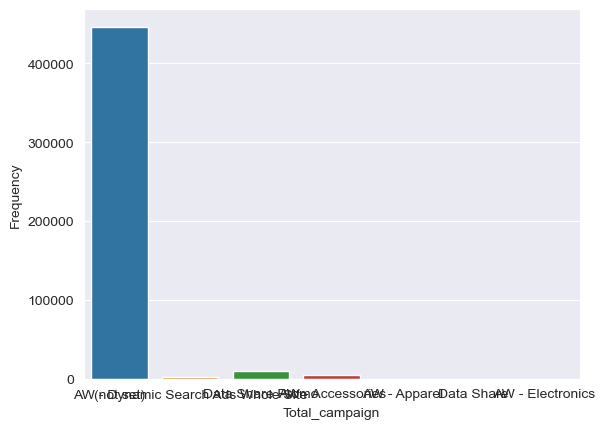

In [14]:
#campaign
univariate_analysis(data_df["campaign"], "Total_campaign")

deviceCategory
desktop    312851
mobile     133180
tablet      18408
Name: count, dtype: int64


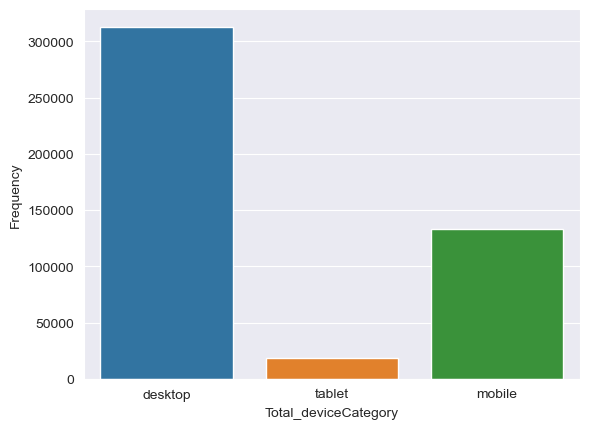

In [15]:
#deviceCategory
univariate_analysis(data_df["deviceCategory"], "Total_deviceCategory")

mobileDeviceModel
not available in demo dataset    464439
Name: count, dtype: int64


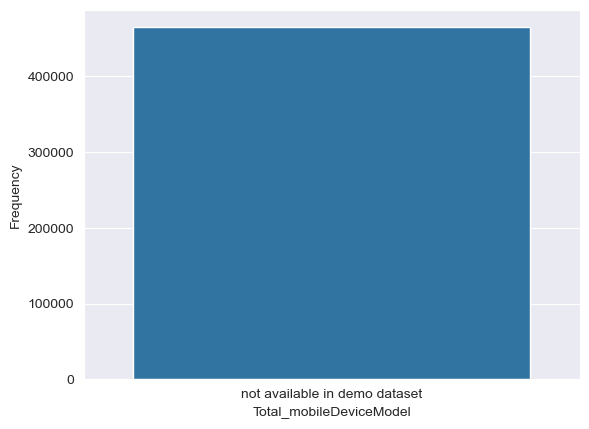

In [16]:
#mobileDeviceModel
univariate_analysis(data_df["mobileDeviceModel"], "Total_mobileDeviceModel")

source
(direct)                        187241
google                          179591
youtube.com                      50205
analytics.google.com             10859
Partners                          9715
                                 ...  
meetup.com                           1
so.com                               1
google.no                            1
basecamp.com                         1
collaborate.northwestern.edu         1
Name: count, Length: 223, dtype: int64


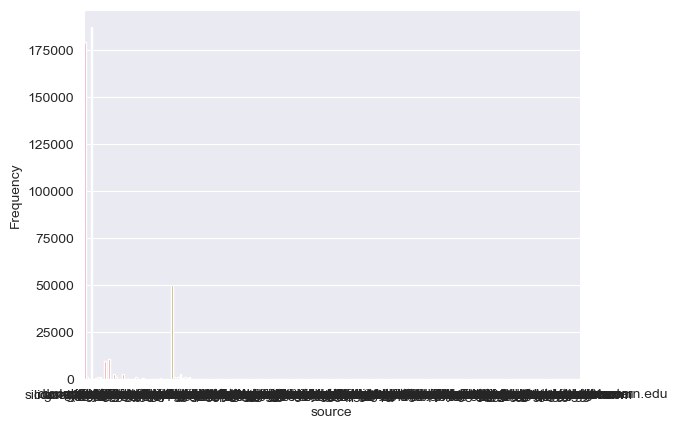

In [17]:
#source
univariate_analysis(data_df["source"], "source")

medium
(none)       187239
organic      173206
referral      81701
affiliate      9708
cpc            9262
cpm            3211
(not set)       112
Name: count, dtype: int64


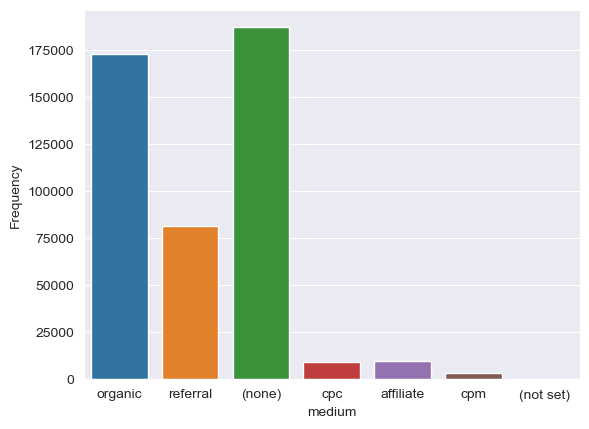

In [18]:
#medium
univariate_analysis(data_df["medium"], "medium")

operatingSystem
Windows          171189
Macintosh        107280
Android           78213
iOS               69077
Linux             19343
Chrome OS         15474
(not set)          2797
Windows Phone       623
Samsung             186
BlackBerry          112
Nintendo WiiU        35
Xbox                 34
Nintendo Wii         33
Firefox OS           32
FreeBSD               7
OpenBSD               2
NTT DoCoMo            1
Nintendo 3DS          1
Name: count, dtype: int64


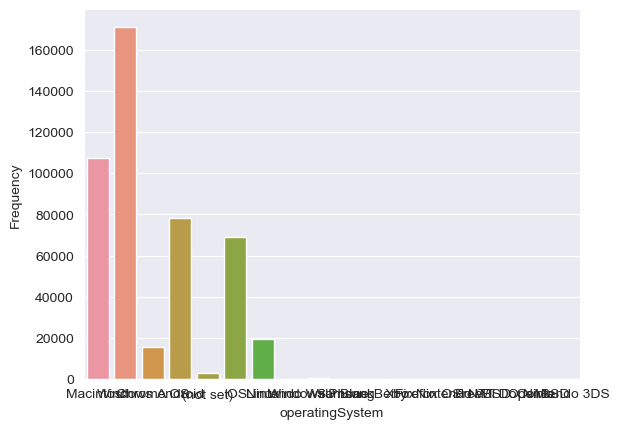

In [19]:
#operatingSystem
univariate_analysis(data_df["operatingSystem"], "operatingSystem")

city
not available in demo dataset    268179
Mountain View                     21560
(not set)                         16313
New York                          14582
San Francisco                     11455
                                  ...  
San Salvador                          5
Saratoga                              3
Boise                                 3
Pryor                                 3
Bozeman                               3
Name: count, Length: 436, dtype: int64


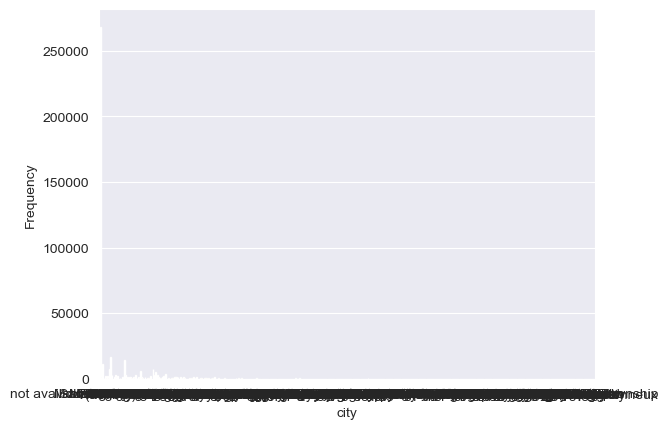

In [20]:
#city
univariate_analysis(data_df["city"], "city")

ChannelGrouping
Organic Search    232876
Direct             85993
Social             59915
Referral           58390
Paid Search        14177
Affiliates          9708
Display             3265
(Other)              114
Organic S              1
Name: count, dtype: int64


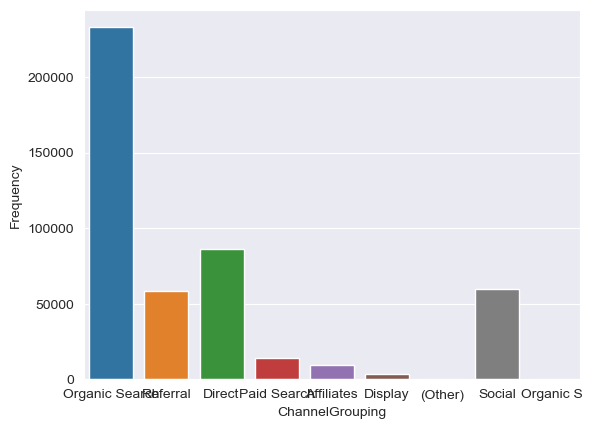

In [21]:
#ChannelGrouping
univariate_analysis(data_df["ChannelGrouping"], "ChannelGrouping")

Conclusion on EDA-

1. 232372 customer bounces out of 464704.
4. Traffic source campaign is set only for very few rows. So its better to drop this column.
5. Device model is blank for the dataset so we will drop this column too.
6. As geoNetwork city has more than 50% of data unavailable. We will use it as it is and if this feature comes out to be useless we will drop it.
7. In case of direct channel grouping the source is also direct and medium is none.

### Feature Engineering & Feature Selection

#### 1. Drop irrelevant cols

In [22]:
data_df.columns

Index(['fullVisitorId', 'VisitNumber', 'Date', 'VisitStartTime', 'bounces',
       'pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions',
       'source', 'medium', 'campaign', 'deviceCategory', 'operatingSystem',
       'mobileDeviceModel', 'city', 'ChannelGrouping'],
      dtype='object')

In [23]:
# irreliavnt cols

data_df.drop(['fullVisitorId', 'VisitNumber', 'Date', 'VisitStartTime', 'city', 'mobileDeviceModel', 'campaign'], axis=1, inplace=  True)
data_df.columns

Index(['bounces', 'pageviews', 'timeOnSite', 'totalTransactionRevenue',
       'transactions', 'source', 'medium', 'deviceCategory', 'operatingSystem',
       'ChannelGrouping'],
      dtype='object')

In [24]:
# Also drop totalTransactionRevenue as the new customer will not have any revenue at starting point

data_df.drop(["totalTransactionRevenue"], axis= 1, inplace = True)
data_df.columns

Index(['bounces', 'pageviews', 'timeOnSite', 'transactions', 'source',
       'medium', 'deviceCategory', 'operatingSystem', 'ChannelGrouping'],
      dtype='object')

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bounces          464439 non-null  float64
 1   pageviews        464439 non-null  float64
 2   timeOnSite       464439 non-null  float64
 3   transactions     464439 non-null  float64
 4   source           464439 non-null  object 
 5   medium           464439 non-null  object 
 6   deviceCategory   464439 non-null  object 
 7   operatingSystem  464439 non-null  object 
 8   ChannelGrouping  464439 non-null  object 
dtypes: float64(4), object(5)
memory usage: 31.9+ MB


### Label Encoding

In [26]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder

data_df = data_df.apply(LabelEncoder().fit_transform)

In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   bounces          464439 non-null  int64
 1   pageviews        464439 non-null  int64
 2   timeOnSite       464439 non-null  int64
 3   transactions     464439 non-null  int64
 4   source           464439 non-null  int32
 5   medium           464439 non-null  int32
 6   deviceCategory   464439 non-null  int32
 7   operatingSystem  464439 non-null  int32
 8   ChannelGrouping  464439 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 23.0 MB


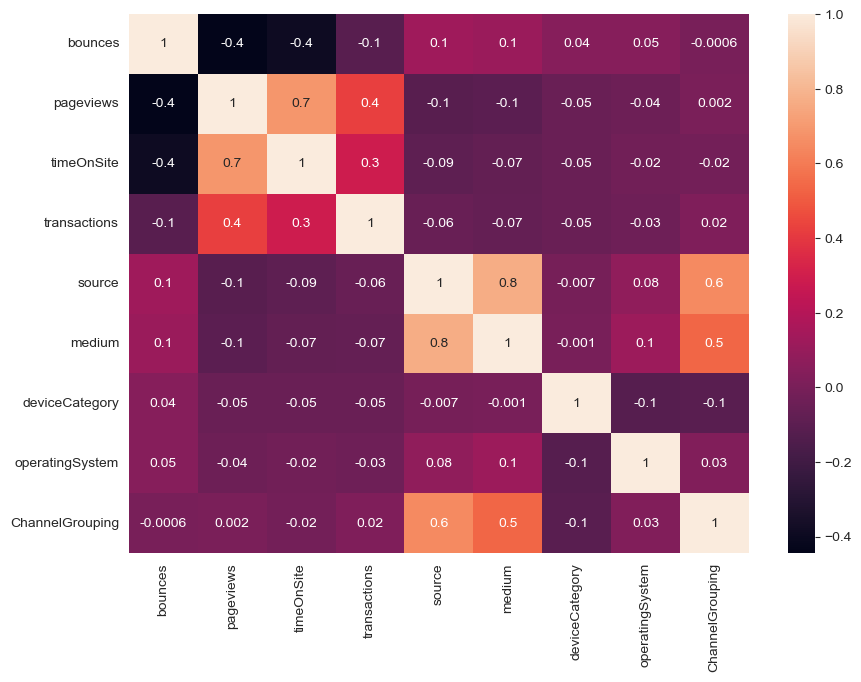

In [28]:
#correlation metrics:
corr= data_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, fmt='.1g')
plt.show()

## Model Decission Tree Building

In [29]:
#Creating new output column(1/0) based on total transaction recording the behavior
#here 1 represent customer has made a transaction and 0 rep no transaction is made

data_df["Output"]= data_df["transactions"].apply(lambda x: 1 if x>=1 else 0)
data_df["Output"].value_counts()

Output
0    458131
1      6308
Name: count, dtype: int64

In [30]:
x_feature = data_df.drop(["transactions", "Output"], axis=1)
print(x_feature.columns)
y=data_df["Output"]

Index(['bounces', 'pageviews', 'timeOnSite', 'source', 'medium',
       'deviceCategory', 'operatingSystem', 'ChannelGrouping'],
      dtype='object')


In [31]:
x_feature.shape

(464439, 8)

In [32]:
train_x, test_x, train_y, test_y = train_test_split(x_feature, y, train_size=0.8, random_state=42)

In [33]:
print(train_x.shape)
print(test_x.shape)

(371551, 8)
(92888, 8)


In [34]:
test_y.value_counts()

Output
0    91648
1     1240
Name: count, dtype: int64

#### Here We may opt two approches to balance the dataset, either upsample the data and then build the model or handle the unbalance in modeling stage

1. Upsample the data set

In [35]:
#Upsampling the unbalance dataset
from sklearn.utils import resample

train_y.value_counts()


Output
0    366483
1      5068
Name: count, dtype: int64

In [36]:
train_x["Output"]= train_y

data_majority= train_x[train_x["Output"]==0]
data_minority= train_x[train_x["Output"]==1]


data_minority_upsample= resample(data_minority, replace = True , n_samples= len(data_majority), random_state= 42)

train_x_upsample= pd.concat([data_minority_upsample, data_majority])

train_x_upsample["Output"].value_counts()

Output
1    366483
0    366483
Name: count, dtype: int64

In [37]:
train_y_up= train_x_upsample["Output"]
train_x_up= train_x_upsample.drop(["Output"], axis= 1)

In [38]:
train_x_up.columns

Index(['bounces', 'pageviews', 'timeOnSite', 'source', 'medium',
       'deviceCategory', 'operatingSystem', 'ChannelGrouping'],
      dtype='object')

In [39]:
print(train_y_up.shape)
print(train_x_up.shape)

(732966,)
(732966, 8)


In [40]:
from sklearn.tree import DecisionTreeClassifier

dtree_up= DecisionTreeClassifier(random_state=5)
dtree_up.fit(train_x_up, train_y_up)

DecisionTreeClassifier(random_state=5)

confusion metrix of Decission Tree Model:


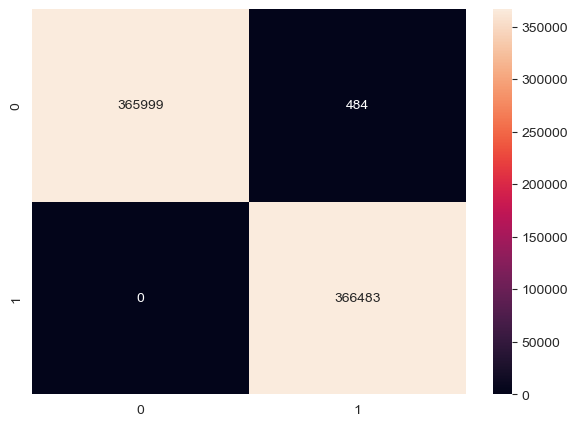



The accuracy of the model dtree is 0.9993396692343165


Classification report for dtree model :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    366483
           1       1.00      1.00      1.00    366483

    accuracy                           1.00    732966
   macro avg       1.00      1.00      1.00    732966
weighted avg       1.00      1.00      1.00    732966



In [41]:
#Accuracy with Training dataset

print("confusion metrix of Decission Tree Model:")

cm= metrics.confusion_matrix(train_y_up, dtree_up.predict(train_x_up))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(train_y_up, dtree_up.predict(train_x_up))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(train_y_up, dtree_up.predict(train_x_up)))

confusion metrix of Decission Tree Model:


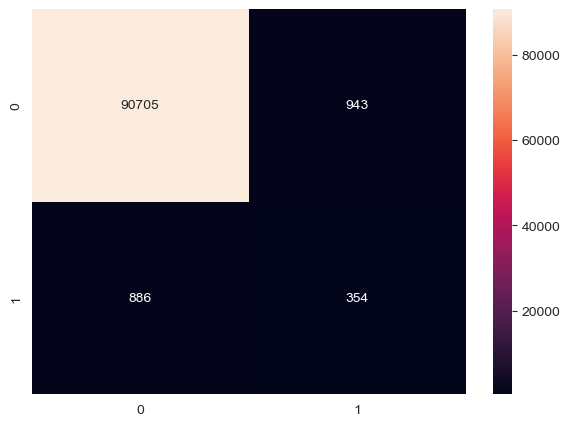



The accuracy of the model dtree is 0.980309620187753


Classification report for dtree model :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91648
           1       0.27      0.29      0.28      1240

    accuracy                           0.98     92888
   macro avg       0.63      0.64      0.63     92888
weighted avg       0.98      0.98      0.98     92888



In [42]:
#Accuracy with testing dataset

print("confusion metrix of Decission Tree Model:")

cm= metrics.confusion_matrix(test_y, dtree_up.predict(test_x))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(test_y, dtree_up.predict(test_x))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(test_y, dtree_up.predict(test_x)))

**1.Accuracy with training data is very high, but with testing data is low.**

**2.Here we may also seen that the Macro average score is very low for testing data. It is predicting 0 class with very high accuracy but prediction of 1 accuracy is very low**

## GridsearchCV to fine tune the model

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 6, 10, 15, 20],
    'min_samples_split': [5,30, 50],
    'criterion': ['gini']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dtree_up,
                           param_grid=param_grid,
                           cv=5,                  # 5-fold cross-validation
                           scoring='accuracy',   # or 'f1', 'roc_auc' etc.
                           verbose=1,            # show progress
                           n_jobs=-1)            # use all cores

# Fit the model
grid_search.fit(train_x_up, train_y_up)

# View the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set 
print("Test set score:", grid_search.score(test_x, test_y))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}
Best cross-validation score: 0.9833184625046515
Test set score: 0.9636336232882611


In [44]:
dtree_up_tune= DecisionTreeClassifier(criterion='gini', max_depth= 20, min_samples_split= 5, random_state=5)
dtree_up_tune.fit(train_x_up, train_y_up)

DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=5)

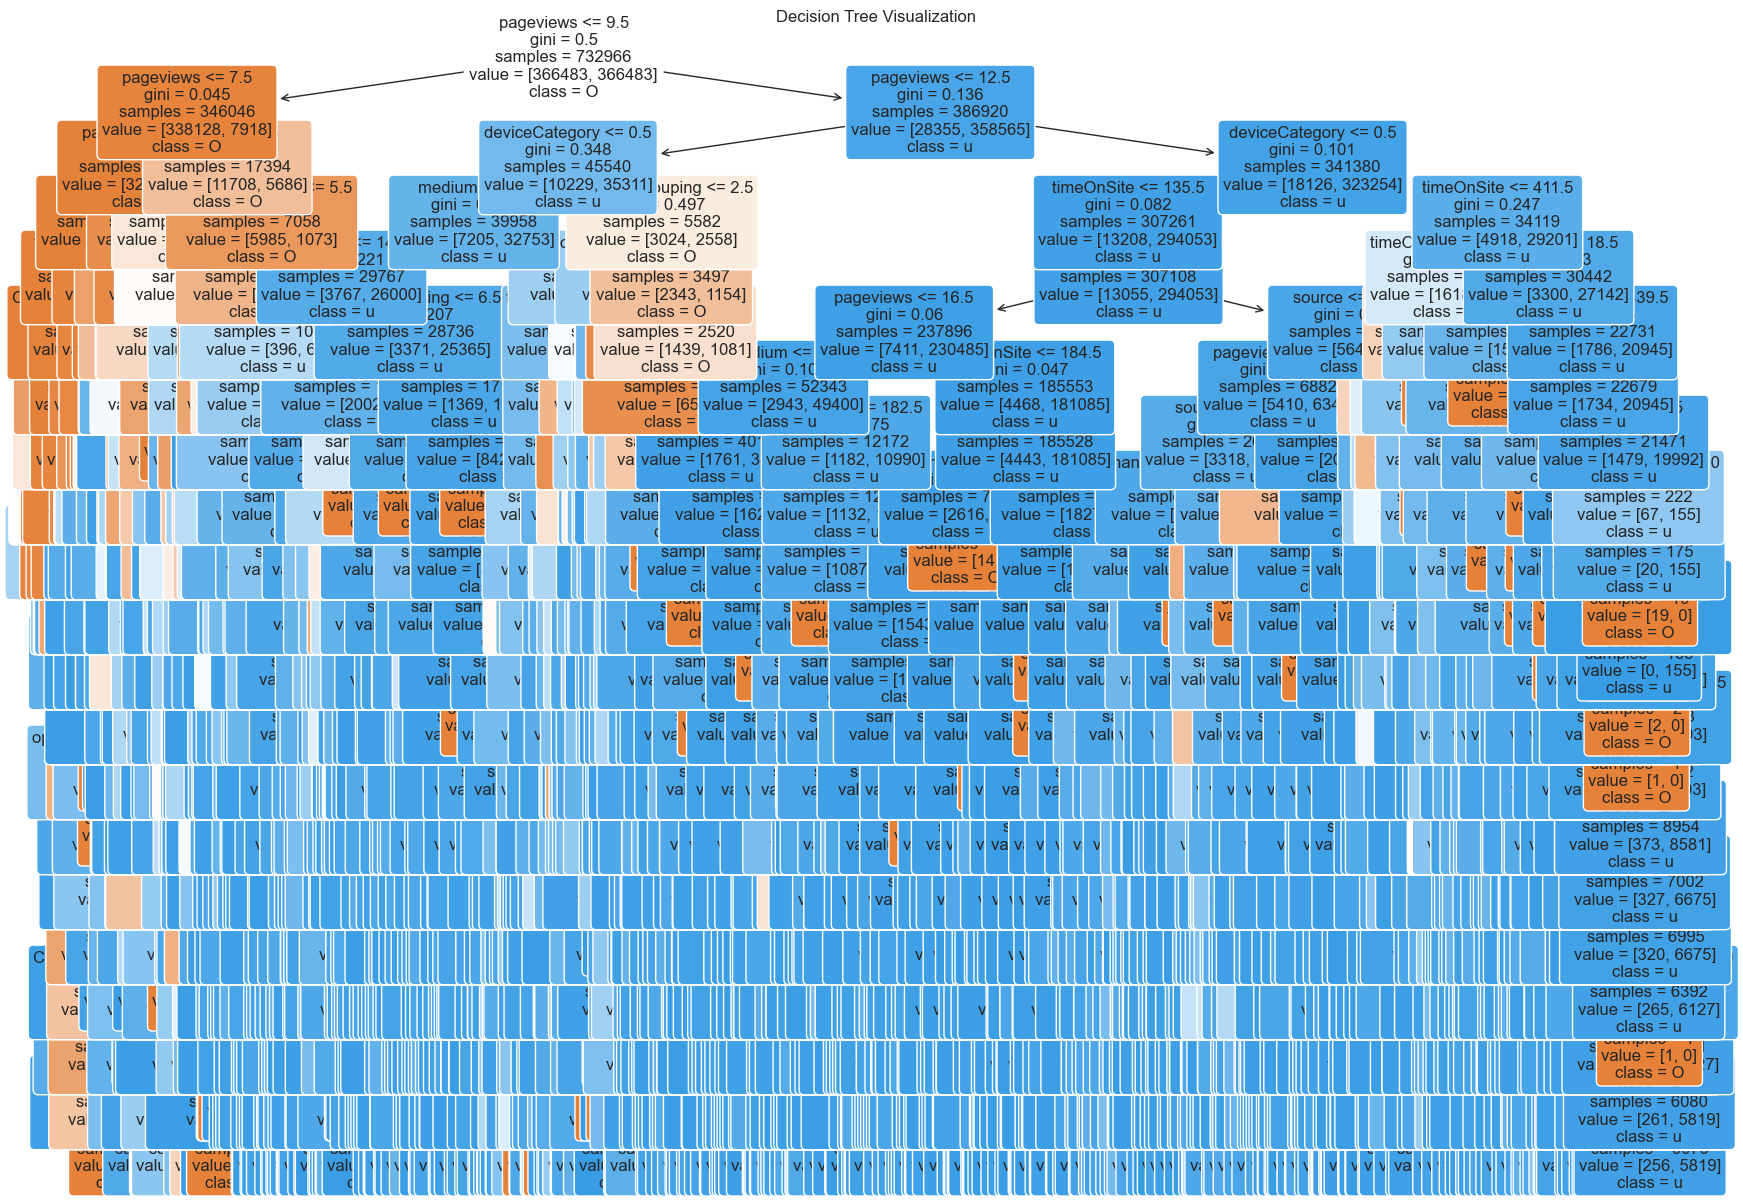

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dtree_up_tune, 
          feature_names=train_x_up.columns, 
          class_names="Output",
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

confusion metrix of Decission Tree Model:


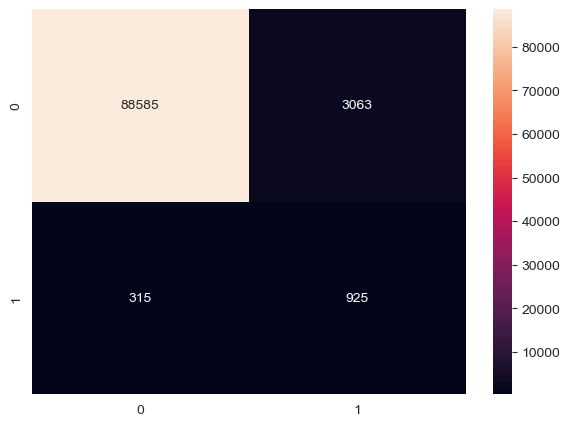



The accuracy of the model dtree is 0.9636336232882611


Classification report for dtree model :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     91648
           1       0.23      0.75      0.35      1240

    accuracy                           0.96     92888
   macro avg       0.61      0.86      0.67     92888
weighted avg       0.99      0.96      0.97     92888



In [46]:
#Accuracy with testing dataset after tuning the model

print("confusion metrix of Decission Tree Model:")

cm= metrics.confusion_matrix(test_y, dtree_up_tune.predict(test_x))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(test_y, dtree_up_tune.predict(test_x))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(test_y, dtree_up_tune.predict(test_x)))

**2nd approach to handle balance dataset at modeling stage**

In [47]:
train_x.drop(["Output"], inplace= True, axis= 1)
print(train_x.columns)

Index(['bounces', 'pageviews', 'timeOnSite', 'source', 'medium',
       'deviceCategory', 'operatingSystem', 'ChannelGrouping'],
      dtype='object')


In [48]:
from sklearn.tree import DecisionTreeClassifier

dtree_balanced= DecisionTreeClassifier(random_state=5,class_weight='balanced')
dtree_balanced.fit(train_x, train_y)

DecisionTreeClassifier(class_weight='balanced', random_state=5)

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dtree, 
          feature_names=train_x.columns, 
          class_names="Output",
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

confusion metrix of Decission Tree Model:


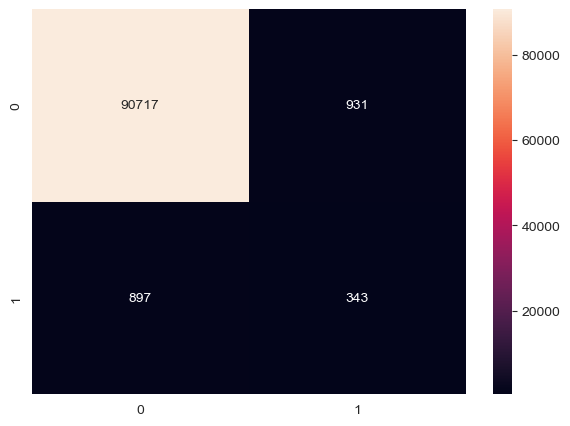



The accuracy of the model dtree is 0.9803203858410129


Classification report for dtree model :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91648
           1       0.27      0.28      0.27      1240

    accuracy                           0.98     92888
   macro avg       0.63      0.63      0.63     92888
weighted avg       0.98      0.98      0.98     92888



In [49]:
#Accuracy with testing dataset

print("confusion metrix of Decission Tree Model:")

cm= metrics.confusion_matrix(test_y, dtree_balanced.predict(test_x))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(test_y, dtree_balanced.predict(test_x))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(test_y, dtree_balanced.predict(test_x)))

confusion metrix of Decission Tree Model:


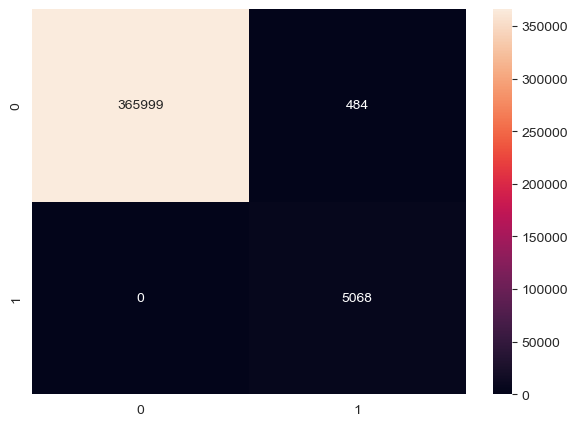



The accuracy of the model dtree is 0.9986973524495965


Classification report for dtree model :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    366483
           1       0.91      1.00      0.95      5068

    accuracy                           1.00    371551
   macro avg       0.96      1.00      0.98    371551
weighted avg       1.00      1.00      1.00    371551



In [50]:
#Accuracy with training data

print("confusion metrix of Decission Tree Model:")

cm= metrics.confusion_matrix(train_y, dtree_balanced.predict(train_x))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(train_y, dtree_balanced.predict(train_x))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(train_y, dtree_balanced.predict(train_x)))

In [51]:
param_grid = {
    'max_depth': [2, 6, 10, 15, 20, None],
    'min_samples_split': [5,30, 50],
    'criterion': ['gini']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dtree_balanced,
                           param_grid=param_grid,
                           cv=5,                  # 5-fold cross-validation
                           scoring='accuracy',   # or 'f1', 'roc_auc' etc.
                           verbose=1,            # show progress
                           n_jobs=-1)            # use all cores

# Fit the model
grid_search.fit(train_x_up, train_y_up)

# View the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set 
print("Test set score:", grid_search.score(test_x, test_y))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 30}
Best cross-validation score: 0.994148432255637
Test set score: 0.980309620187753


In [52]:
dtree_balanced_tune= DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= 30, random_state=5,class_weight='balanced')
dtree_balanced_tune.fit(train_x, train_y)

DecisionTreeClassifier(class_weight='balanced', min_samples_split=30,
                       random_state=5)

confusion metrix of Decission Tree Model:


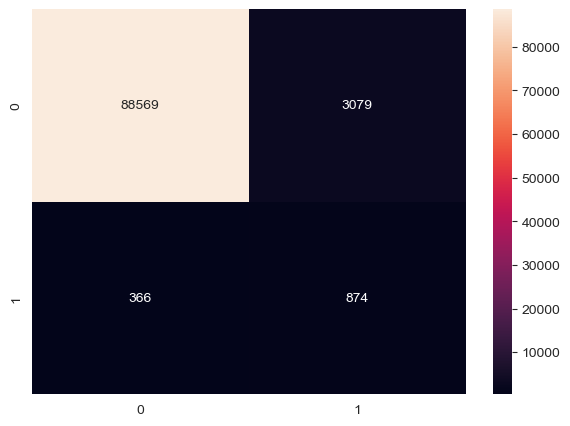



The accuracy of the model dtree is 0.9629123245198519


Classification report for dtree model :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     91648
           1       0.22      0.70      0.34      1240

    accuracy                           0.96     92888
   macro avg       0.61      0.84      0.66     92888
weighted avg       0.99      0.96      0.97     92888



In [53]:
#Accuracy with testing dataset

print("confusion metrix of Decission Tree Model:")

cm= metrics.confusion_matrix(test_y, dtree_balanced_tune.predict(test_x))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(test_y, dtree_balanced_tune.predict(test_x))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(test_y, dtree_balanced_tune.predict(test_x)))

## Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfmodel=RandomForestClassifier(criterion='gini', random_state= 42, class_weight='balanced')
rfmodel.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', random_state=42)

confusion metrix of Random Forest Model:


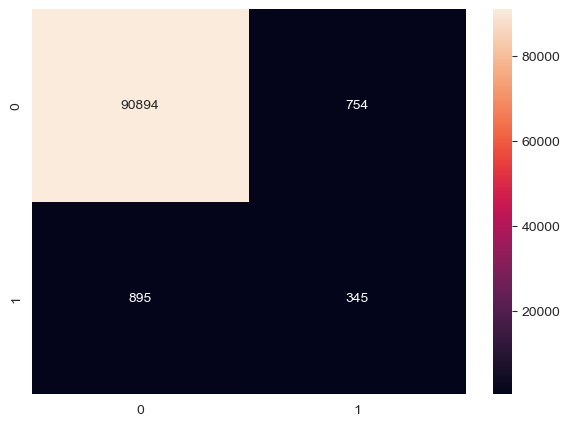



The accuracy of the model dtree is 0.9822474377745242


Classification report for dtree model :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91648
           1       0.31      0.28      0.29      1240

    accuracy                           0.98     92888
   macro avg       0.65      0.63      0.64     92888
weighted avg       0.98      0.98      0.98     92888



In [56]:
#Accuracy with testing dataset

print("confusion metrix of Random Forest Model:")

cm= metrics.confusion_matrix(test_y, rfmodel.predict(test_x))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(test_y, rfmodel.predict(test_x))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(test_y, rfmodel.predict(test_x)))

In [57]:
param_grid = {
    'n_estimators': [100, 200],                # number of trees
    'max_depth': [None, 10, 20, 30],           # depth of trees
    'min_samples_split': [5, 10],           # min samples to split a node
    'bootstrap': [True, False]                 # whether bootstrap samples are used
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rfmodel,
                           param_grid=param_grid,
                           cv=3,                  # 3]\-fold cross-validation
                           scoring='accuracy',   # or 'f1', 'roc_auc' etc.
                           verbose=1,            # show progress
                           n_jobs=-1)            # use all cores

# Fit the model
grid_search.fit(train_x, train_y)

# View the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set 
print("Test set score:", grid_search.score(test_x, test_y))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9808774556985618
Test set score: 0.9805787615192489


In [58]:
rfmodel_tune=RandomForestClassifier(criterion='gini',bootstrap= True, max_depth= None, min_samples_split= 5, n_estimators= 200, random_state= 42, class_weight='balanced')
rfmodel_tune.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=200, random_state=42)

confusion metrix of Random Forest Model:


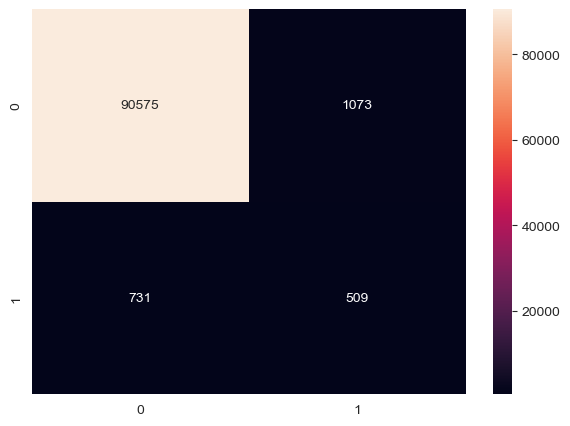



The accuracy of the model dtree is 0.9805787615192489


Classification report for dtree model :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91648
           1       0.32      0.41      0.36      1240

    accuracy                           0.98     92888
   macro avg       0.66      0.70      0.68     92888
weighted avg       0.98      0.98      0.98     92888



In [59]:
#Accuracy with testing dataset

print("confusion metrix of Random Forest Model:")

cm= metrics.confusion_matrix(test_y, rfmodel_tune.predict(test_x))

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='1g')
plt.show()

print('\n')
print("The accuracy of the model dtree is {}".format(metrics.accuracy_score(test_y, rfmodel_tune.predict(test_x))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(test_y, rfmodel_tune.predict(test_x)))

Conclusion-

As total_pageview and total_time on site are two most imp important features based on the rules. 